##  Import data through APIs

In [208]:
import pandas as pd
import numpy as np
import requests
import json

In [5]:
df = pd.read_excel(r"C:\Users\shwet\Downloads\Air_BNB.xlsx")
df

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


##### 1. What is the importance of data collection in the field of data analysis?

##### 2. Explain the difference between structured and unstructured data. How does it impact data collection and preparation?


##### 3.What are some common challenges faced during the data collection process? Provide examples.


##### 4. Describe the process of data cleaning and its significance in preparing high-quality data for analysis.


##### 5. How can sampling techniques such as random sampling and stratified sampling be used in data collection? Discuss their advantages and disadvantages.



##### 6. What are the key steps involved in data preprocessing before performing statistical analysis?



##### 7. Explain the concept of feature scaling in data preparation. Why is it important in machine learning models?



##### 8. Discuss the role of data transformation techniques like normalization and standardization in preparing data for modeling.



##### 9. How can missing data be handled effectively during the data cleaning process? Provide some strategies.



##### 10. In the context of data collection, what is meant by data quality assessment? Why is it important?



##### 11. What are some ethical considerations to keep in mind when collecting data for analysis purposes?



## Data preparation and featuring

#### Counting the Null values

In [7]:
df.drop('id', axis =1, inplace = True)

In [9]:
df.describe()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price
count,74108.000000,73908.000000,74107.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,3.155125,1.235272,0.734060,94.067365,1.265797,1.710868,4.782069
std,2.153603,0.582054,0.441835,7.836556,0.852149,1.254142,0.717394
min,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,92.000000,1.000000,1.000000,4.317488
50%,2.000000,1.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,4.000000,1.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,16.000000,8.000000,1.000000,100.000000,10.000000,18.000000,7.600402


In [11]:
df.isnull().sum() # total number of null values across the columns

room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

In [13]:
round(df.isnull().sum()*100/df.shape[0], 2)  # % of null values across columns

room_type                0.01
accommodates             0.00
bathrooms                0.27
cancellation_policy      0.01
cleaning_fee             0.01
instant_bookable         0.00
review_scores_rating    22.56
bedrooms                 0.12
beds                     0.18
log_price                0.00
dtype: float64

#### Null Value Treatment

#### Mean Imputation

In [49]:
df_mean = df.copy()
df_median = df.copy()
df_pred = df.copy()

In [25]:

cat = []
num = []

for i in df_mean.columns:
    if df_mean[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)


In [27]:
# FOR NUMERICAL COLUMNS

for column in df_mean.columns:
    if df_mean[column].dtype != 'object':
        mean = df_mean[column].mean()
        df_mean[column] = df_mean[column].fillna(mean)

In [29]:
# FOR CATEGORICAL COLUMNS

for column in df_mean.columns:
    if df_mean[column].dtype == 'object':
        mode = df_mean[column].mode()
        df_mean[column] = df_mean[column].fillna(mode)

#### Median Imputation

In [175]:
# FOR NUMERICAL COLUMNS

for column in df_median.columns:
    if df_median[column].dtype != 'object':
        mean = df_median[column].mean()
        df_median[column] = df_median[column].fillna(mean)

In [177]:
# FOR CATEGORICAL COLUMNS

for column in df_median.columns:
    if df_median[column].dtype == 'object':
        mode = df_median[column].mode()[0]
        df_median[column] = df_median[column].fillna(mode)

#### KNN Imputers

In [31]:
df_pred[num].isnull().sum()

accommodates                3
bathrooms                 203
cleaning_fee                4
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

In [33]:
df_pred[cat].isnull().sum()

room_type              5
cancellation_policy    8
instant_bookable       0
dtype: int64

In [35]:
from sklearn.impute import KNNImputer

In [36]:
df_pred

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


###### We will run Linear Regression on each mean, median and predictive model to find the most effective performance for predicting the missing values.
###### For running Linear Regressions, the cagtegorical values needs to be converted into numerical values.

In [39]:
# CONVERTING CAT TO NUM VALUES

for feature in df_pred.columns:
    if df_pred[feature].dtype == 'object':
        print('\n')
        print('feature: ', feature)
        print(pd.Categorical(df_pred[feature].unique()))
        print(pd.Categorical(df_pred[feature].unique()).codes)
        df_pred[feature] = pd.Categorical(df_pred[feature]).codes



feature:  room_type
['Entire home/apt', 'Private room', 'Shared room', NaN]
Categories (3, object): ['Entire home/apt', 'Private room', 'Shared room']
[ 0  1  2 -1]


feature:  cancellation_policy
['strict', 'moderate', 'flexible', NaN]
Categories (3, object): ['flexible', 'moderate', 'strict']
[ 2  1  0 -1]


feature:  instant_bookable
['f', 't']
Categories (2, object): ['f', 't']
[0 1]


In [43]:
imputer = KNNImputer(n_neighbors = 5)
df_imputed = imputer.fit_transform(df_pred)
df_pred_imputed = pd.DataFrame(data = df_imputed, columns = df_pred.columns)

In [45]:
df_pred_imputed.isnull().sum()

room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

## EDA (Exploratory Data Analysis)

### Univariate Analysis

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

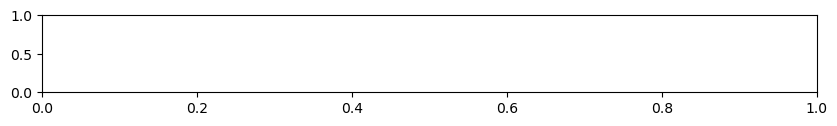

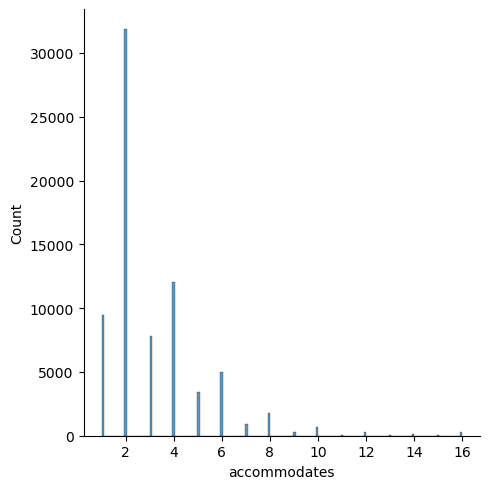

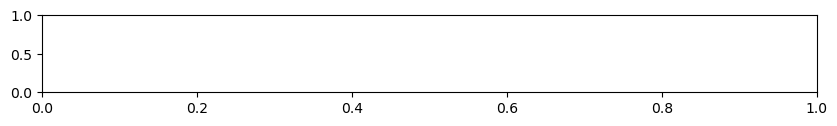

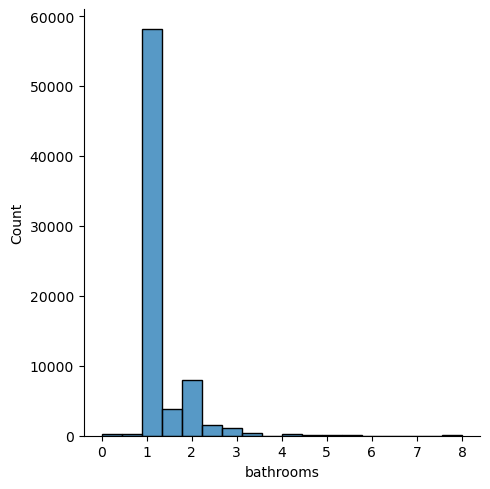

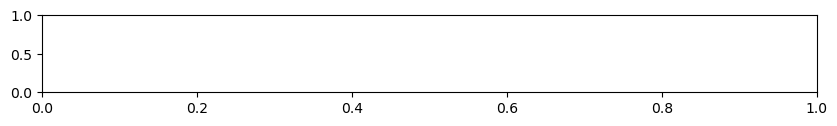

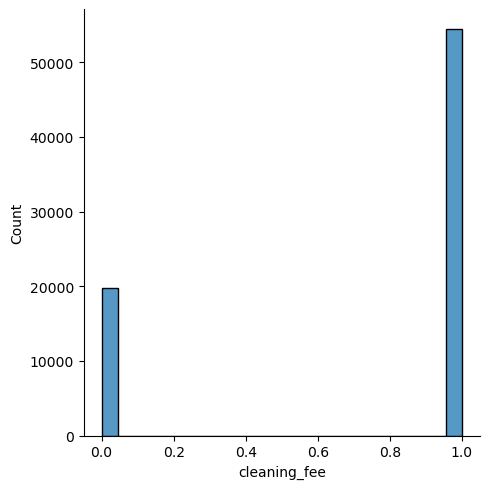

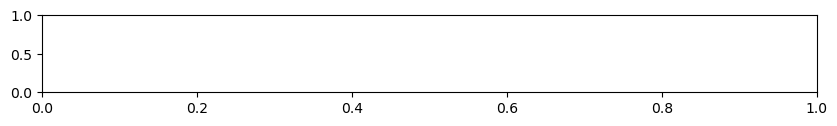

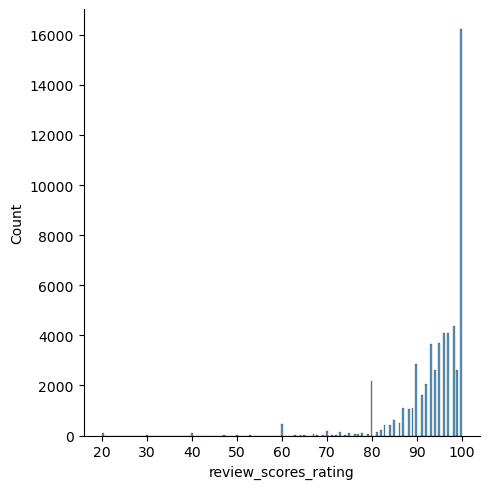

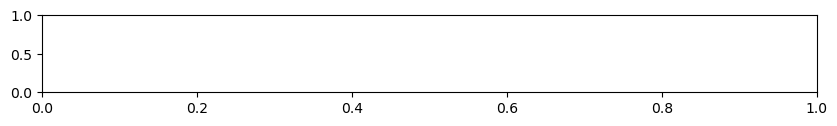

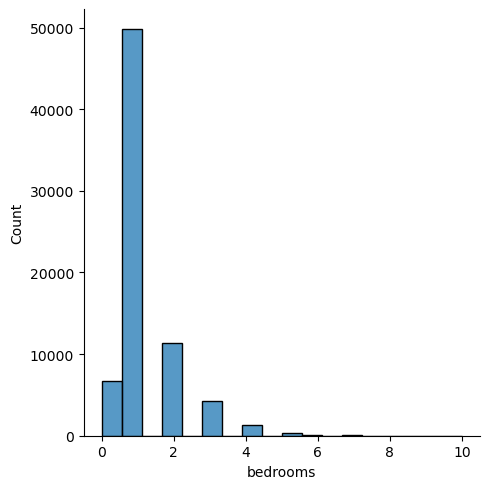

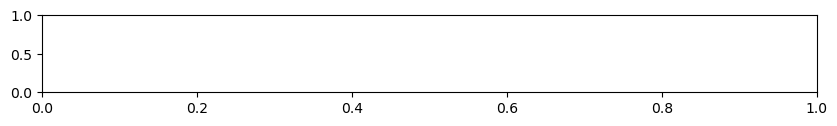

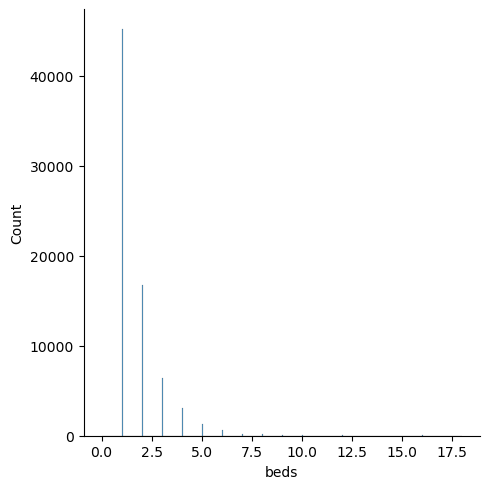

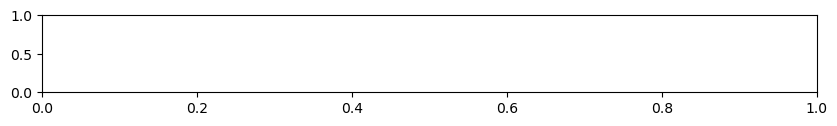

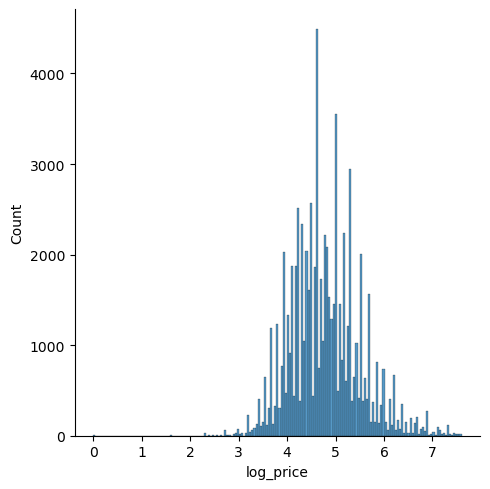

In [51]:
# Distribution plot

for i in num:
    fig, axs = plt.subplots(nrows =1, ncols=1, figsize=(10,1))
    sns.displot(df_mean[i])

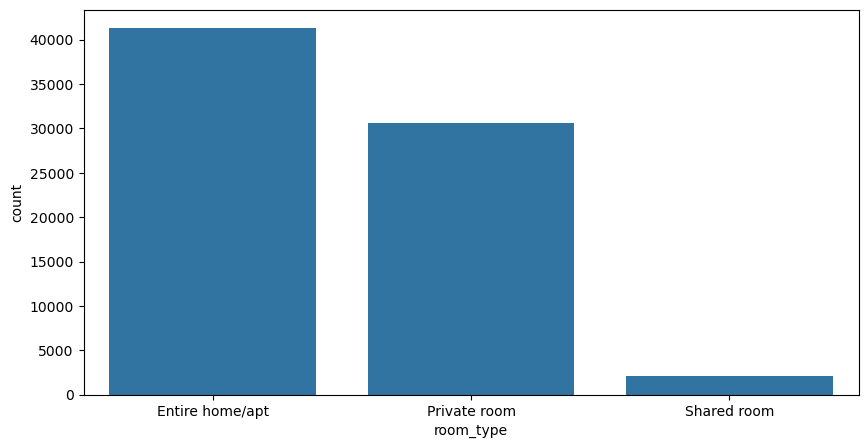

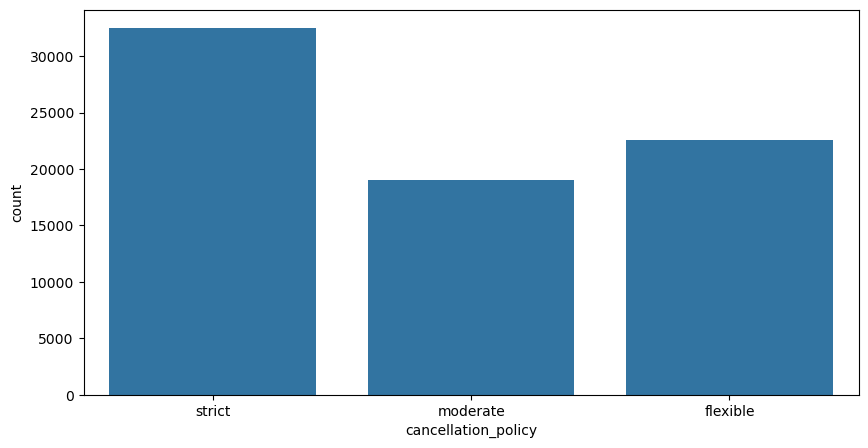

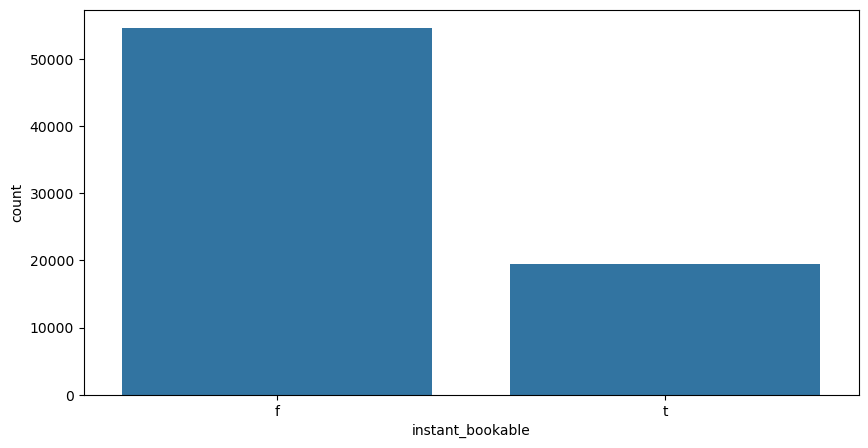

In [53]:
# Count Plot

for i in df_mean[cat]:
    fig,axs = plt.subplots(nrows =1, ncols=1, figsize=(10,5))
    sns.countplot(x=df_mean[i], data = df_mean[cat])

### Bivariate Analysis 

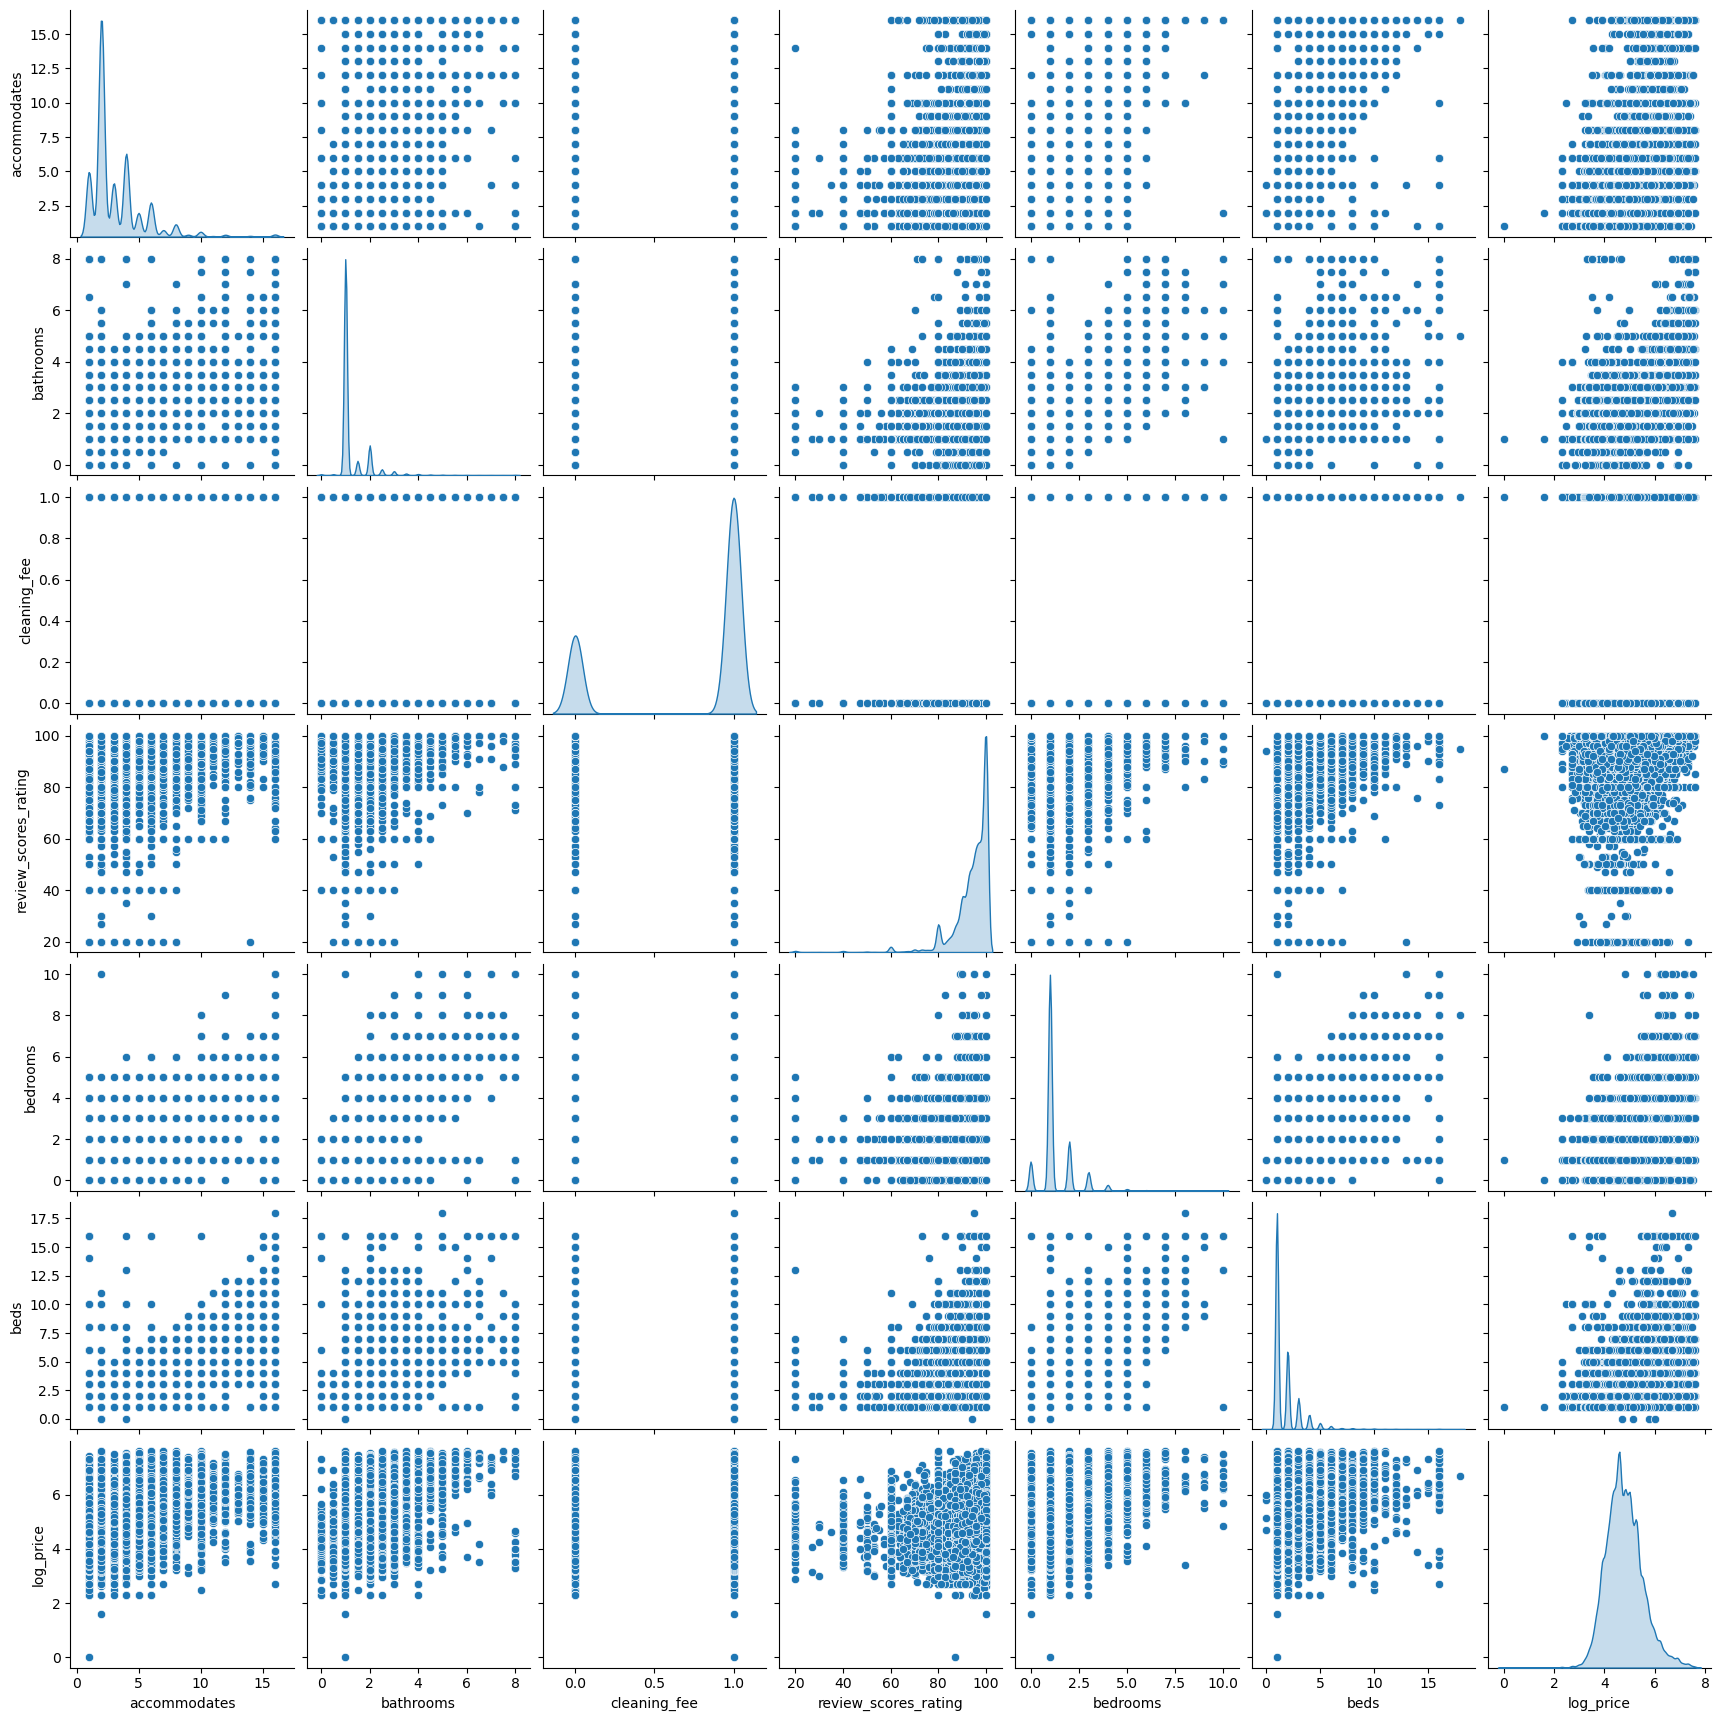

In [55]:
# PAIR PLOT (mostly used) returns a distribution plot for each pair of variables to analyse. Relationship between target variable and other variable.

df_attr = (df_mean[cont])
sns.pairplot(df_attr, diag_kind = 'kde')
plt.show()

<Axes: >

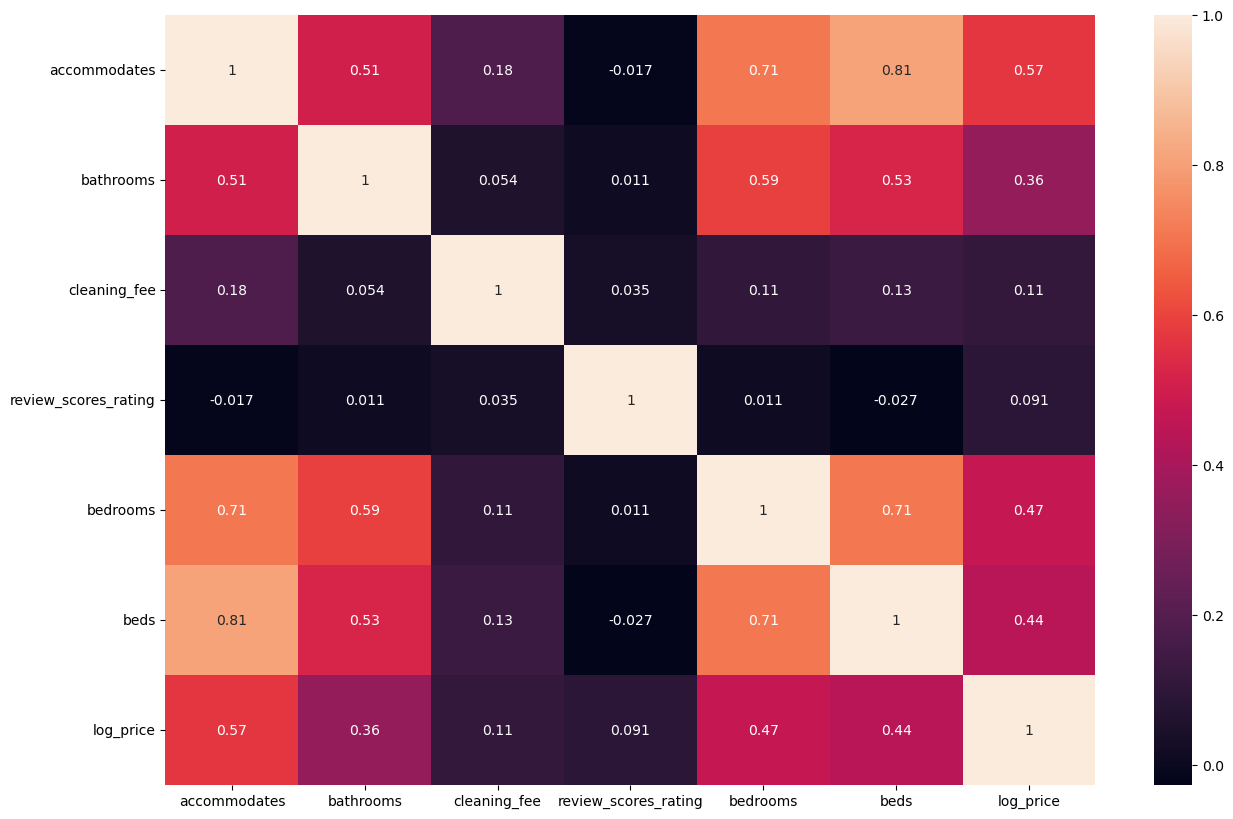

In [57]:
# HEATMAP finds the correlation between the variables.

plt.figure(figsize=(15,10))
sns.heatmap(df_mean[num].corr(), annot = True)


##### In correlation plot, we can see to what extent a variable defines the other variable.
##### When one independent variable is defined by another independetnt variable, that situation is called MULTICOLINEARITY.

### Outlier Treatment

##### Boxplot gives the distribution of a particular variable.
##### There are 4 points in the boxplot called the PERCENTILE points. 

##### PERCENTILE - is what %age of the data is below that particular point. 
##### upper point is called the UPPER TAIL (1.5 IQR - Inter Quartile Range) and lower point(1.5 IQR - Inter Quartile Range) is called the LOWER TAIL.

##### IQR - Difference between 2nd and 3rd point (actual box in the boxplot)

##### Data beyond the upper & lower tail are the OUTLIERS.

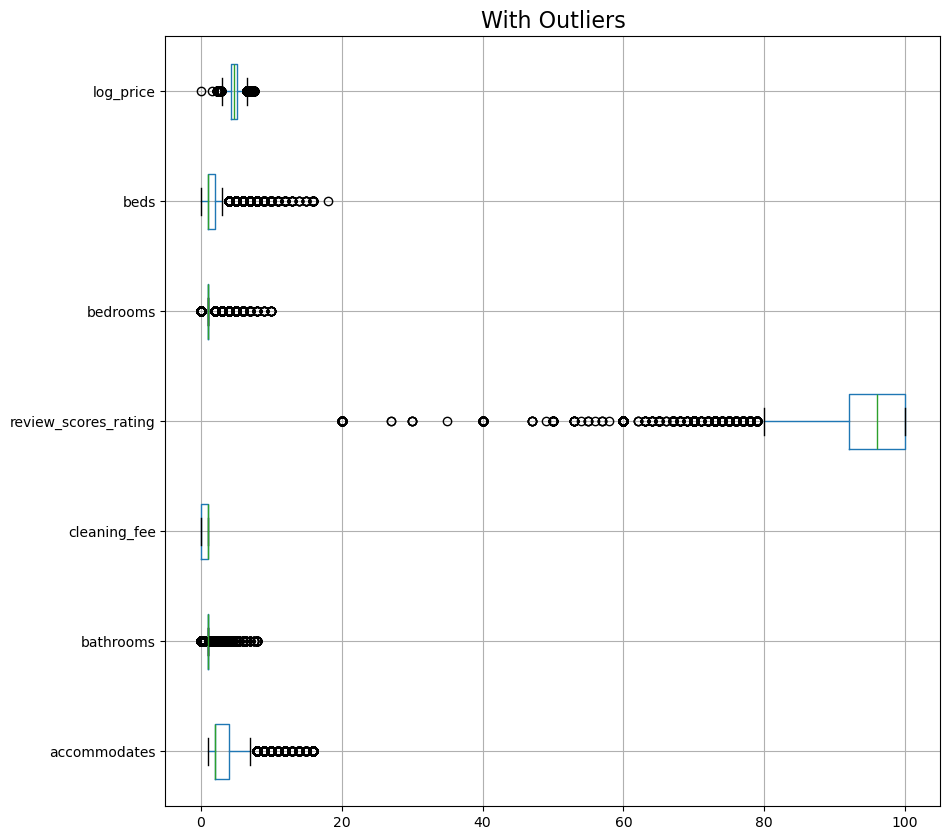

In [59]:
cont = df_mean.dtypes[(df_mean.dtypes != 'unit8') & (df_mean.dtypes != 'bool')].index
plt.figure(figsize=(10,10))
df_mean[cont].boxplot(vert = 0)
plt.title('With Outliers', fontsize=16)
plt.show()


In [79]:
# Outliers above the upper tail is moved below the lower tail so as not to impact on the regression model.

def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [65]:
df_mean

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [67]:
# Giving labels to the categorical data so as the entire data is in numbers.

for feature in df_mean.columns:
    if df_mean[feature].dtype == 'object':
        print('\n')
        print('feature: ', feature)
        print(pd.Categorical(df_mean[feature].unique()))
        print(pd.Categorical(df_mean[feature].unique()).codes)
        df_mean[feature] = pd.Categorical(df_mean[feature]).codes



feature:  room_type
['Entire home/apt', 'Private room', 'Shared room', NaN]
Categories (3, object): ['Entire home/apt', 'Private room', 'Shared room']
[ 0  1  2 -1]


feature:  cancellation_policy
['strict', 'moderate', 'flexible', NaN]
Categories (3, object): ['flexible', 'moderate', 'strict']
[ 2  1  0 -1]


feature:  instant_bookable
['f', 't']
Categories (2, object): ['f', 't']
[0 1]


In [71]:
for column in df_mean.columns:
    if df_mean[column].dtype != 'object':
        mean = df_mean[column].mean()
        df_mean[column] = df_mean[column].fillna(mean)

In [73]:
df_mean

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,0,3.0,1.0,2,1.0,0,100.000000,1.0,1.0,5.010635
1,0,7.0,1.0,2,1.0,1,93.000000,3.0,3.0,5.129899
2,0,5.0,1.0,1,1.0,1,92.000000,1.0,3.0,4.976734
3,0,4.0,1.0,0,1.0,0,94.067365,2.0,2.0,6.620073
4,0,2.0,1.0,1,1.0,1,40.000000,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,1,1.0,1.0,0,0.0,0,94.067365,1.0,1.0,4.605170
74107,0,4.0,2.0,1,1.0,0,93.000000,2.0,4.0,5.043425
74108,0,5.0,1.0,1,1.0,1,94.000000,2.0,2.0,5.220356
74109,0,2.0,1.0,2,1.0,1,94.067365,0.0,2.0,5.273000


In [75]:
# Split df_mean in 2 parts:

df_mean_wot = df_mean.copy()

In [81]:
for column in df_mean[cont].columns:
    lr, ur = remove_outlier(df_mean[column])
    df_mean[column] = np.where(df_mean[column] > ur, ur, df_mean[column])
    df_mean[column] = np.where(df_mean[column] < lr, lr, df_mean[column])

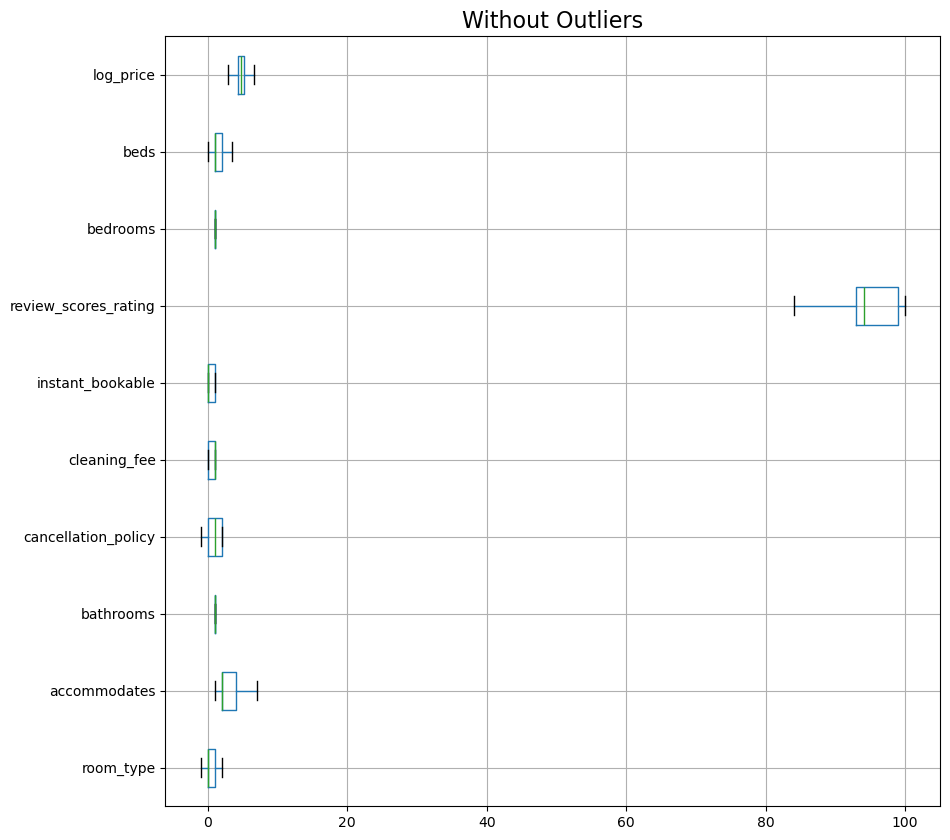

In [85]:
cont = df_mean.dtypes[(df_mean.dtypes != 'unit8') & (df_mean.dtypes != 'bool')].index
plt.figure(figsize=(10,10))
df_mean[cont].boxplot(vert = 0)
plt.title('Without Outliers', fontsize=16)
plt.show()

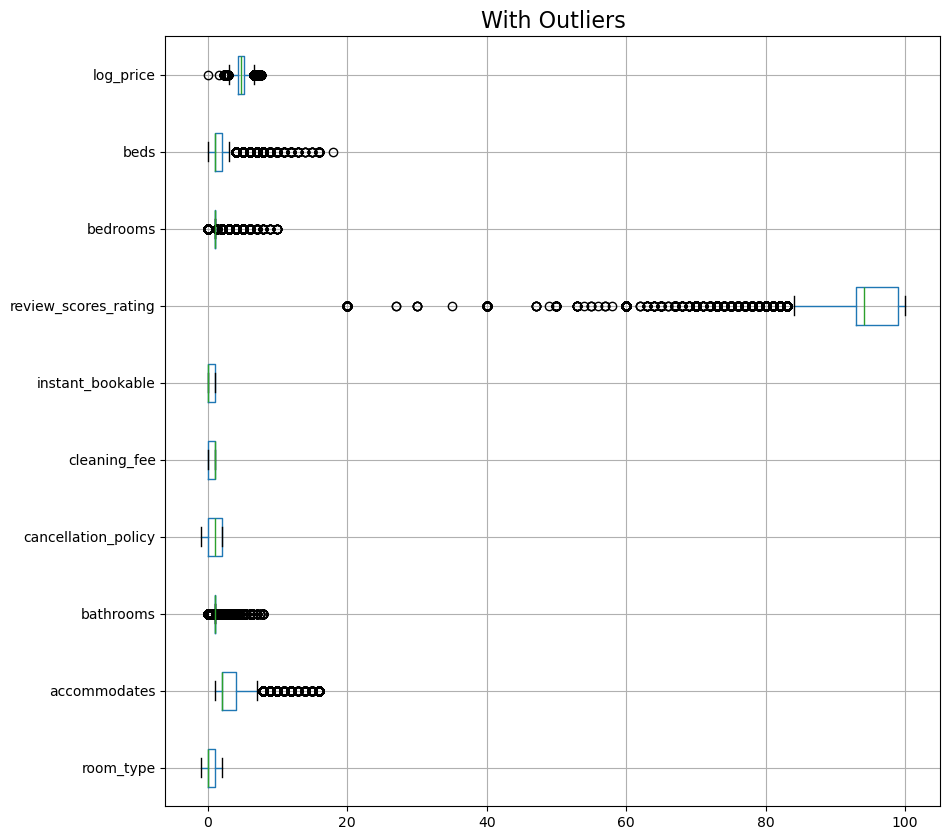

In [87]:
cont = df_mean_wot.dtypes[(df_mean_wot.dtypes != 'unit8') & (df_mean_wot.dtypes != 'bool')].index
plt.figure(figsize=(10,10))
df_mean_wot[cont].boxplot(vert = 0)
plt.title('With Outliers', fontsize=16)
plt.show()

#### Model Building

##### Train Test Split

##### If the predicted y value is close enough to the actual y-value, then we can say the MODEL is good. This is how each model's performance is defined. 

In [91]:
# separating independent and dependent var - x and y

x = df_mean.drop('log_price', axis = 1)
y = df_mean['log_price']

In [93]:
x.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds
0,0.0,3.0,1.0,2.0,1.0,0.0,100.000000,1.0,1.0
1,0.0,7.0,1.0,2.0,1.0,1.0,93.000000,1.0,3.0
2,0.0,5.0,1.0,1.0,1.0,1.0,92.000000,1.0,3.0
3,0.0,4.0,1.0,0.0,1.0,0.0,94.067365,1.0,2.0
4,0.0,2.0,1.0,1.0,1.0,1.0,84.000000,1.0,1.0


##### For model selection, we need a library called Test Train Split. 

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

## Linear Regression

In [121]:
from sklearn.linear_model import LinearRegression

In [135]:
LR_mean = LinearRegression()
LR_mean.fit(x_train, y_train) # fitting x-train and y_train means, trying and finding the relationship betwn them. 

LinearRegression()

In [137]:
LR_mean.coef_ # returns 9 coefs as there are 9 variables columns in the dataset

array([-5.35421407e-01,  1.42916079e-01,  8.65193334e-17, -1.64432114e-03,
       -8.46151721e-02, -7.51966466e-02,  1.14247855e-02,  0.00000000e+00,
        3.75645943e-02])

In [139]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, LR_mean.coef_[idx]))

The coefficient for room_type is -0.5354214068847135
The coefficient for accommodates is 0.14291607894513195
The coefficient for bathrooms is 8.651933336434325e-17
The coefficient for cancellation_policy is -0.001644321142217308
The coefficient for cleaning_fee is -0.08461517206689717
The coefficient for instant_bookable is -0.07519664660369252
The coefficient for review_scores_rating is 0.011424785480368436
The coefficient for bedrooms is 0.0
The coefficient for beds is 0.03756459432094969


In [141]:
intercept = LR_mean.intercept_

print("The intercept of our model is {}".format(intercept))

The intercept of our model is 3.537850050083034


In [147]:
LR_mean.score(x_train, y_train)

0.4949357985797377

In [145]:
LR_mean.score(x_test, y_test) # x_test. y_test are unseen data to the model coz we have only fitted the train data.

0.4866580532068622

##### Now, lets test the regression model on another set of data. 

In [170]:
x = df_mean_wot.drop('log_price', axis = 1)
y = df_mean_wot['log_price']

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [160]:
LR_mean_wo = LinearRegression()
LR_mean_wo.fit(x_train, y_train)

LinearRegression()

In [162]:
LR_mean_wo.score(x_train, y_train)

0.5160038922043981

In [164]:
LR_mean_wo.score(x_test, y_test)

0.5117693733732945

##### Better results without Outliers.

## Lasso and Ridge Regression

In [172]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [174]:
lasso_mean = Lasso(alpha = 0.1)
lasso_mean.fit(x_train, y_train)
print("Lasso model: ", (lasso_mean.coef_))

Lasso model:  [-0.20257702  0.14380021  0.          0.         -0.         -0.
  0.0056319   0.          0.        ]


In [176]:
lasso_mean.score(x_train, y_train)

0.4126383837173965

In [178]:
lasso_mean.score(x_test, y_test)

0.41234605070190133

In [181]:
Ridge_mean = Ridge(alpha = 1.0)
Ridge_mean.fit(x_train, y_train)


Ridge()

In [183]:
Ridge_mean.score(x_train, y_train)

0.516003890991849

In [185]:
Ridge_mean.score(x_test, y_test)

0.511769745542461

In [187]:
x = df_mean_wot.drop('log_price', axis = 1)
y = df_mean_wot['log_price']

In [189]:
lasso_mean_wo = Lasso(alpha = 0.1)
lasso_mean_wo.fit(x_train, y_train)
print("Lasso model: ", (lasso_mean_wo.coef_))

Lasso model:  [-0.20257702  0.14380021  0.          0.         -0.         -0.
  0.0056319   0.          0.        ]


In [191]:
lasso_mean_wo.score(x_train, y_train)

0.4126383837173965

In [193]:
lasso_mean_wo.score(x_test, y_test)

0.41234605070190133

In [197]:
ridge_mean_wo = Ridge()
ridge_mean_wo.fit(x_train, y_train)
print("Lasso model: ", (ridge_mean_wo.coef_))

Lasso model:  [-0.61277499  0.08037109  0.14888492 -0.00126298 -0.08027929 -0.0549494
  0.00567447  0.14861955 -0.04626215]


In [199]:
ridge_mean_wo.score(x_train, y_train)

0.516003890991849

In [201]:
ridge_mean_wo.score(x_test, y_test)

0.511769745542461

##### convert the entire result into a dataframe.

In [216]:
result_dataframe = pd.DataFrame(columns = ['Models', 'Train_Score', 'Test_Score'])
result_dataframe

,Models,Train_Score,Test_Score
